### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.figure_factory import create_distplot
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Set some global/initial variables
VERBOSE = False         #trigger additional (verbose) output

BIN_RATIO_MAX = 0.95   #maximum proportion of data in any category
BIN_RATIO_MIN = 0.01   #minimum proportion of data in any category
TOO_MANY_BINS = 10     #maximum category count in any column
NULL_RATIO_MAX = 0.80  #maximum ratio of null values to total values in the column
ZSCORE_MAX = 3.0       #maximum zscore for numerical data outliers

total_rows = len(data.index) #total rows in the dataset

2. Investigate the dataset for missing or problematic data.

**Q2 Response**: 

We begin by investigating several types of problematic data: 
1. too many NULL/NA values in any column
2. categorical/object columns 
    - one category contains nearly all of the data (> BIN_RATIO_MAX)
    - one category contains nearly no data (< BIN_RATIO_MIN)
    - excessively high number of categories (> TOO_MANY_BINS)
    - missing/poorly named object data categories
3. outliers with high Z-score in numerical columns

At this point in the course, these are the main types of "problematic data" we are looking for. We anticipate learning additional techniques in later modules.

In [6]:
# Question 2, Part 1: Detect columns with too many NULL/NA values
null_max_cols = []

for column in data.columns.values:
    cs_count = data[column].count()
    
    if((total_rows - cs_count) / total_rows > NULL_RATIO_MAX):
        null_max_cols.append(column)
        
    if VERBOSE:
        print(cs_count)
        print()
        
if len(null_max_cols) == 0:
    print("Found %d Column(s) with too much null data." % len(null_max_cols))
else:
    print("Found %d Column(s) with too much null data:" % len(null_max_cols))
    null_max_cols.sort()
    for column in null_max_cols:
        print('    ', column)

Found 1 Column(s) with too much null data:
     car


In [7]:
#Question 2, Part 2: Detect/Show features for object datatypes
#
#   Issues Analyzed: 
#
#   * one category contains nearly all of the data (> BIN_RATIO_MAX)
#   * one category contains nearly no data (< BIN_RATIO_MIN)
#   * excessively high number of categories (> TOO_MANY_BINS)
#   * missing/poorly named object data categories
#
bin_max_cols = []
bin_min_cols = []
large_bin_count_cols = []

for column in data.columns.values:
    #print(column, end=' ')
    if data.dtypes[column] == 'object':
        cs = data[column].value_counts()
        cs_count = data[column].count()
        
        #Check if any categorical column has > BIN_RATIO_MAX in any one category
        #  This is thought to have lower statistical significance for prediction
        #  We would consider dropping these columns or categories from a model as not representative
        if (cs > (cs_count * BIN_RATIO_MAX)).any():
            bin_max_cols.append(column)
            
        #Check if any categorical column has < BIN_RATIO_MIN in any one category
        #  This is thought to have lower statistical significance for prediction
        #  We would consider dropping these categories from a model as not representative
        if (cs < (cs_count * BIN_RATIO_MIN)).any():
            bin_min_cols.append(column)
            
        #Check if we find an excessive number of bins for any categorical column
        if (len(cs.index) > TOO_MANY_BINS):
            large_bin_count_cols.append(column)
            
        if VERBOSE: 
            print(cs)
            print()

if len(bin_max_cols) == 0:
    print("Found %d Column(s) with too much data in a single bin." % len(bin_max_cols))
else:
    print("Found %d Column(s) with too much data in a single bin:" % len(bin_max_cols))
    bin_max_cols.sort()
    for column in bin_max_cols:
        print('    ', column)
        
if len(bin_min_cols) == 0:
    print("Found %d Column(s) with not enough data in a single bin." % len(bin_min_cols))
else:
    print("Found %d Column(s) with not enough data in a single bin:" % len(bin_min_cols))
    bin_min_cols.sort()
    for column in bin_min_cols:
        print('    ', column)      
        
if len(large_bin_count_cols) == 0:
    print("Found %d Large Bin Count Column(s)." % len(large_bin_count_cols))
else:
    print("Found %d Large Bin Count Column(s):" % len(large_bin_count_cols))
    large_bin_count_cols.sort()
    for column in large_bin_count_cols:
        print('    ', column)

Found 0 Column(s) with too much data in a single bin.
Found 2 Column(s) with not enough data in a single bin:
     education
     occupation
Found 1 Large Bin Count Column(s):
     occupation


In [8]:
#Question 2, Part 3: Detect/Show features for numeric datatypes
outlier_columns = []
for column in data.columns.values:
    #print(column, end=' ')
    if data.dtypes[column] == 'int64':
        #z-3 outlier counts
        cs = np.abs(stats.zscore(data[column]) < 3).value_counts()
        if False in cs:
            outlier_columns.append(column)
        if VERBOSE:
            print(cs)
            print()

if len(outlier_columns) == 0:
    print("Found %d Outlier Column(s) (z-score > 3)." % len(outlier_columns))
else:
    print("Found %d Outlier Column(s) (z-score > 3):" % len(outlier_columns))
    outlier_columns.sort()
    for column in outlier_columns:
        print('    ', column)
    print()
    
    outlier_series = np.abs(stats.zscore(data[outlier_columns]) < 3).all(axis=1)
    outlier_count = total_rows - outlier_series.sum() 
    print("%d total outlier rows" % outlier_count)

Found 1 Outlier Column(s) (z-score > 3):
     toCoupon_GEQ5min

12684 total outlier rows


3. Decide what to do about your missing data -- drop, replace, other...

**Q3 Response**: 
1. We noticed that the `car` column is mostly null (~100 values out of ~12k data points). As a result, we will drop this unreliable data series.
2. We noticed that the `toCoupon_GEQ5min` column is always True, so we drop this data series as well
3. We noticed that `education` and `occupation` columns may potentially have trouble predicting in certain categories. We won't drop these but will be careful when making conclusions from this data.

Notably, the category labels seemed descriptive and sensible so we did not change them.

We noticed the "passanger" columns was misspelled, so we correct that spelling mistake.

In [9]:
#Question 3: Drop unwanted columns
data.drop(columns=['car', 'toCoupon_GEQ5min'], inplace=True)

#rename passanger column
data = data.rename(columns={'passanger': 'passenger'})

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
accept_rate = 100.0 * data['Y'].value_counts()[1] / data['Y'].count()
print("The coupon was accepted in %.1f%% of total observations/offers" % accept_rate)

The coupon was accepted in 56.8% of total observations/offers


5. Use a bar plot to visualize the `coupon` column.

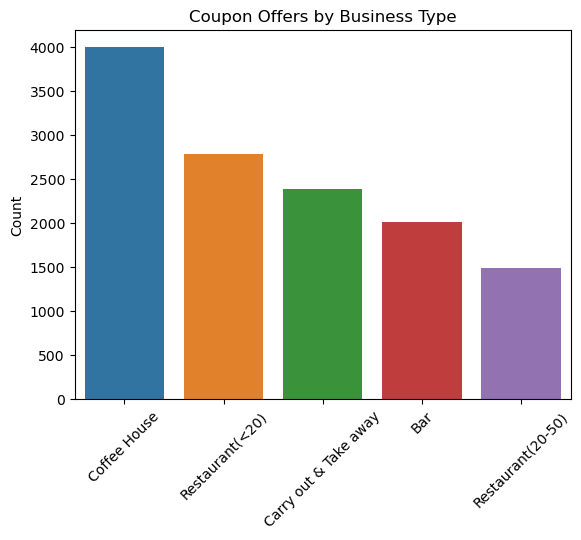

In [11]:
#Question 5, bar plot of coupon column
c = pd.DataFrame(data['coupon'].value_counts())
c = c.transpose()
ax = sns.barplot(c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.set_title("Coupon Offers by Business Type")
plt.show()

6. Use a histogram to visualize the temperature column.

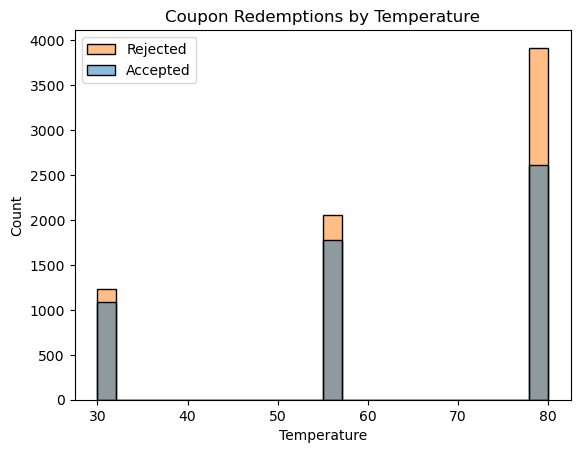

In [12]:
#Question 6, histogram of the temperature column with Accept/Reject actions noted
ax = sns.histplot(data, x='temperature', hue='Y')
ax.set_ylabel("Count")
ax.set_xlabel("Temperature")
ax.set_title("Coupon Redemptions by Temperature")
ax.legend(['Rejected', 'Accepted'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_df = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [14]:
bar_accept_rate = 100.0 * bar_df['Y'].value_counts()[1] / bar_df['Y'].count()
print("The \"Bar\" coupon was accepted in %.1f%% of total observations/offers" % bar_accept_rate)

The "Bar" coupon was accepted in 41.0% of total observations/offers


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
#Question 3
#get dataframes for the 2 categories described
bar_fewer = bar_df.query('(Bar == "never") | (Bar == "less1") | (Bar == "1~3")')
bar_more = bar_df.query('not ((Bar == "never") | (Bar == "less1") | (Bar == "1~3"))')

#calculate acceptance rate for both categories
bar_fewer_accept_rate = 100.0 * bar_fewer['Y'].value_counts()[1] / bar_fewer['Y'].count()
bar_more_accept_rate = 100.0 * bar_more['Y'].value_counts()[1] / bar_more['Y'].count()
bar_difference_rate = 100.0 * (bar_more_accept_rate - bar_fewer_accept_rate) / bar_fewer_accept_rate

#print a descriptive message about the comparison
bar_msg = '''The \"Bar\" coupon was accepted in %.1f%% of total observations/offers among people who:\n\
    * went to the bar %s times per month'''
print(bar_msg % (bar_fewer_accept_rate, "3 or fewer"))
print(bar_msg % (bar_more_accept_rate, "4 or more"))
print('This represents a %.1f%% change in the rate of acceptance of this coupon type between the groups studied.' % (bar_difference_rate,))

The "Bar" coupon was accepted in 37.1% of total observations/offers among people who:
    * went to the bar 3 or fewer times per month
The "Bar" coupon was accepted in 73.2% of total observations/offers among people who:
    * went to the bar 4 or more times per month
This represents a 97.5% change in the rate of acceptance of this coupon type between the groups studied.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
#Question 4
#get dataframes for the 2 categories described
bar_older = bar_df.query('(not ((Bar == "never") | (Bar == "less1"))) & \
    (not ((age == "21") | (age == "below21")))')
bar_younger = bar_df.query('not ((not ((Bar == "never") | (Bar == "less1"))) & \
    (not ((age == "21") | (age == "below21"))))')

#calculate acceptance rate for both categories
bar_older_accept_rate = 100.0 * bar_older['Y'].value_counts()[1] / bar_older['Y'].count()
bar_younger_accept_rate = 100.0 * bar_younger['Y'].value_counts()[1] / bar_younger['Y'].count()
bar_difference_rate = 100.0 * (bar_younger_accept_rate - bar_older_accept_rate) / bar_older_accept_rate

#print a descriptive message about the comparison
bar_msg = '''The \"Bar\" coupon was accepted in %.1f%% of total observations/offers among people who:\n\
    %s'''
print(bar_msg % (bar_older_accept_rate, "* were over 25 AND\n    * went to the bar more than once/month"))
print(bar_msg % (bar_younger_accept_rate, "* were under 25 OR\n    * went to the bar 1 or fewer times/month"))
print('This represents a %.1f%% change in the rate of acceptance of this coupon type between the groups studied.' \
    % (bar_difference_rate,))

The "Bar" coupon was accepted in 68.2% of total observations/offers among people who:
    * were over 25 AND
    * went to the bar more than once/month
The "Bar" coupon was accepted in 33.4% of total observations/offers among people who:
    * were under 25 OR
    * went to the bar 1 or fewer times/month
This represents a -51.0% change in the rate of acceptance of this coupon type between the groups studied.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [17]:
#Question 5
#get a dataframe for the category described
bar_special = bar_df.query('(not ((Bar == "never") | (Bar == "less1"))) & (passenger != "Kid(s)") & \
    (occupation != "Farming Fishing & Forestry")')

#calculate acceptance rate for the category
bar_special_count = bar_special['Y'].count()
bar_special_accept_rate = 100.0 * bar_special['Y'].value_counts()[1] / bar_special_count

#print a descriptive message 
print("The \"Bar\" coupon acceptance rate for drivers who:")
print("    * go to bars more than once a month AND")
print("    * had passengers that were not a kid AND") 
print("    * had occupations other than farming, fishing, or forestry\n")
print("was %.1f%% of total observations/offers (%d total offers)" % (bar_special_accept_rate, bar_special_count))

The "Bar" coupon acceptance rate for drivers who:
    * go to bars more than once a month AND
    * had passengers that were not a kid AND
    * had occupations other than farming, fishing, or forestry

was 70.3% of total observations/offers (569 total offers)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
#Question 6

#get dataframes for each of 3 categories:

#category 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_c1 = bar_df.query('(not ((Bar == "never") | (Bar == "less1"))) & (passenger != "Kid(s)") & \
    (maritalStatus != "Widowed")')

#category 2: go to bars more than once a month and are under the age of 30 
bar_c2 = bar_df.query('(not ((Bar == "never") | (Bar == "less1"))) & \
    ((age == "below21") | (age == "21") | (age == "26"))')

#category 3: go to cheap restaurants more than 4 times a month and income is less than 50K
bar_c3 = bar_df.query('((RestaurantLessThan20 == "4~8") | (RestaurantLessThan20 == "gt8")) & \
    ((income == "Less than $12500") | (income == "$12500 - $24999") | \
    (income == "$25000 - $37499") | (income == "$37500 - $49999"))')

#calculate acceptance rate for all categories
bar_c1_count = bar_c1['Y'].count()
bar_c2_count = bar_c2['Y'].count()
bar_c3_count = bar_c3['Y'].count()
bar_c1_accept_rate = 100.0 * bar_c1['Y'].value_counts()[1] / bar_c1_count
bar_c2_accept_rate = 100.0 * bar_c2['Y'].value_counts()[1] / bar_c2_count
bar_c3_accept_rate = 100.0 * bar_c3['Y'].value_counts()[1] / bar_c3_count

#print a descriptive message about the comparison
print("The \"Bar\" coupon acceptance rate for drivers who:")
print("    * go to bars more than once a month AND")
print("    * had passengers that were not a kid AND") 
print("    * were not widowed")
print("was %.1f%% of total observations/offers (%d total offers)" % (bar_c1_accept_rate, bar_c1_count))
print()
print("The \"Bar\" coupon acceptance rate for drivers who:")
print("    * go to bars more than once a month AND")
print("    * are under the age of 30") 
print("was %.1f%% of total observations/offers (%d total offers)" % (bar_c2_accept_rate, bar_c2_count))
print()
print("The \"Bar\" coupon acceptance rate for drivers who:")
print("    * go to cheap restaurants more than 4x/month AND")
print("    * income is < $50k") 
print("was %.1f%% of total observations/offers (%d total offers)" % (bar_c3_accept_rate, bar_c3_count))


The "Bar" coupon acceptance rate for drivers who:
    * go to bars more than once a month AND
    * had passengers that were not a kid AND
    * were not widowed
was 70.3% of total observations/offers (569 total offers)

The "Bar" coupon acceptance rate for drivers who:
    * go to bars more than once a month AND
    * are under the age of 30
was 72.2% of total observations/offers (349 total offers)

The "Bar" coupon acceptance rate for drivers who:
    * go to cheap restaurants more than 4x/month AND
    * income is < $50k
was 45.3% of total observations/offers (344 total offers)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Q7 Response**: Based on the scenarios we investigated related to Bar coupons, the greatest influence on acceptance of Bar coupons seems to be among people who already went to bars more frequently. Said differently, Bar coupon acceptance appeared to have a significant positive correlation with bar patronage. Additional study of this coupon type would likely yield additional relationships we did not explore in the directed responses.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

For the independent investigation, we chose to focus on the Restaurant(20-50) category. This is understood to be medium-high priced restaurants. We were curious about this category since many of the other categories were thought to be more about convenience, whereas this category may have other factors that determine its use. Let's begin our investigation...

Text(0.5, 0, 'Coupon Acceptance')

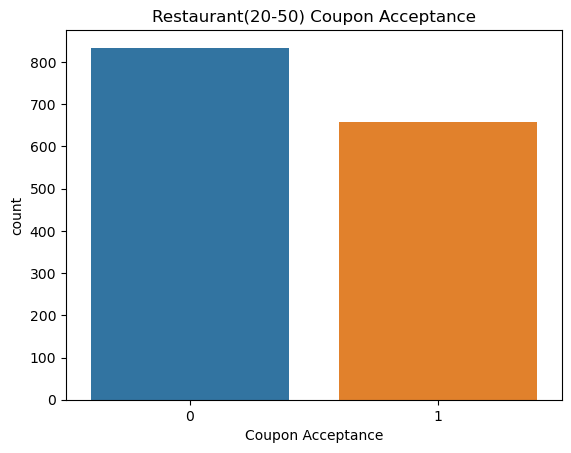

In [19]:
#compute overall coupon acceptance rates
restaurants = pd.DataFrame(data.query('coupon == "Restaurant(20-50)"'))
rest_rows = len(restaurants.index)
rest_accept = pd.DataFrame(restaurants.groupby(['Y'])['Y'].count())
rest_accept.columns = ['count']
rest_accept = rest_accept.reset_index()
#rest_accept_count = rest_accept[1]
#rest_accept_rate = 100.0 * rest_accept_count / rest_rows

#plot our conclusion
ax = sns.barplot(rest_accept, x='Y', y='count')
ax.set_title('Restaurant(20-50) Coupon Acceptance')
ax.set_xlabel('Coupon Acceptance')
#print("The Restaurant(20-50) coupon was offered %d times and accepted %d times (acceptance rate=%.1f%%)." % \
#      (rest_rows, rest_accept_count, rest_accept_rate))



### Analysis

In our next code cell, we optionally print the categorical columns' acceptance rate to review where we have the highest acceptance rate. We explore the highest correlations found here in the following cells.

This step was necessary and highly important in our discovery of relationships and findings.

**Note: enabling `VERBOSE` output is necessary to see these relationships. We disable it by default to avoid excessive output.**

In [20]:
#If VERBOSE mode is enabled, print the acceptance rate for all categorical data
if VERBOSE:
    for column in data.columns.values:
        print(restaurants.groupby([column, 'Y'])['Y'].count() / restaurants.groupby([column])['Y'].count())
        print()

### Discussion

After examining each of the categorical columns from the last step, we noticed several trends. The following columns were highly correlated with coupon acceptance:
1. passenger 
2. time (the time of day the coupon is offered)
3. education (education level of the driver)
4. occupation (certain occupations were significantly more likely to accept the coupon)
5. Restaurant20To50 
6. maritalStatus
7. weather
8. temperature
9. expiration 

We couldn't help but notice additional trends which stood out but less significantly:
1. There was a lesser relationship between lower priced restaurant patronage and coupon acceptance
2. People going to bars > 8x/month were very likely to accept the coupon
3. People going to Coffee Houses 1-3x/month were likely to accept the coupon

Finally, it was notable which columns did NOT contribute significantly to acceptance of the coupon. The following columns had a slight but mostly insignificant relationship with coupon acceptance:
1. income 
2. direction_same/direction_opp (direction of travel)
3. toCoupon_GEQ15min/toCoupon_GE25min (distance to the coupon location)
4. has_children
5. age
6. gender





### Representative Plots
We continue our analysis by showing several plots representiative of high correlation as well as some commentary.

Our objective in this section is to point out several key relationships but we do not attempt to show all relationships.


**Restaurant20to50**

Past patronage of restaurants in the 20 to 50 price point is highly correlated with acceptance of another coupon in this category. See plot below.

This is an incredibly strong relationship and highly correlated with coupon acceptance.

C:\Users\mibrown\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Acceptance Rate by Restaurant Patronage')

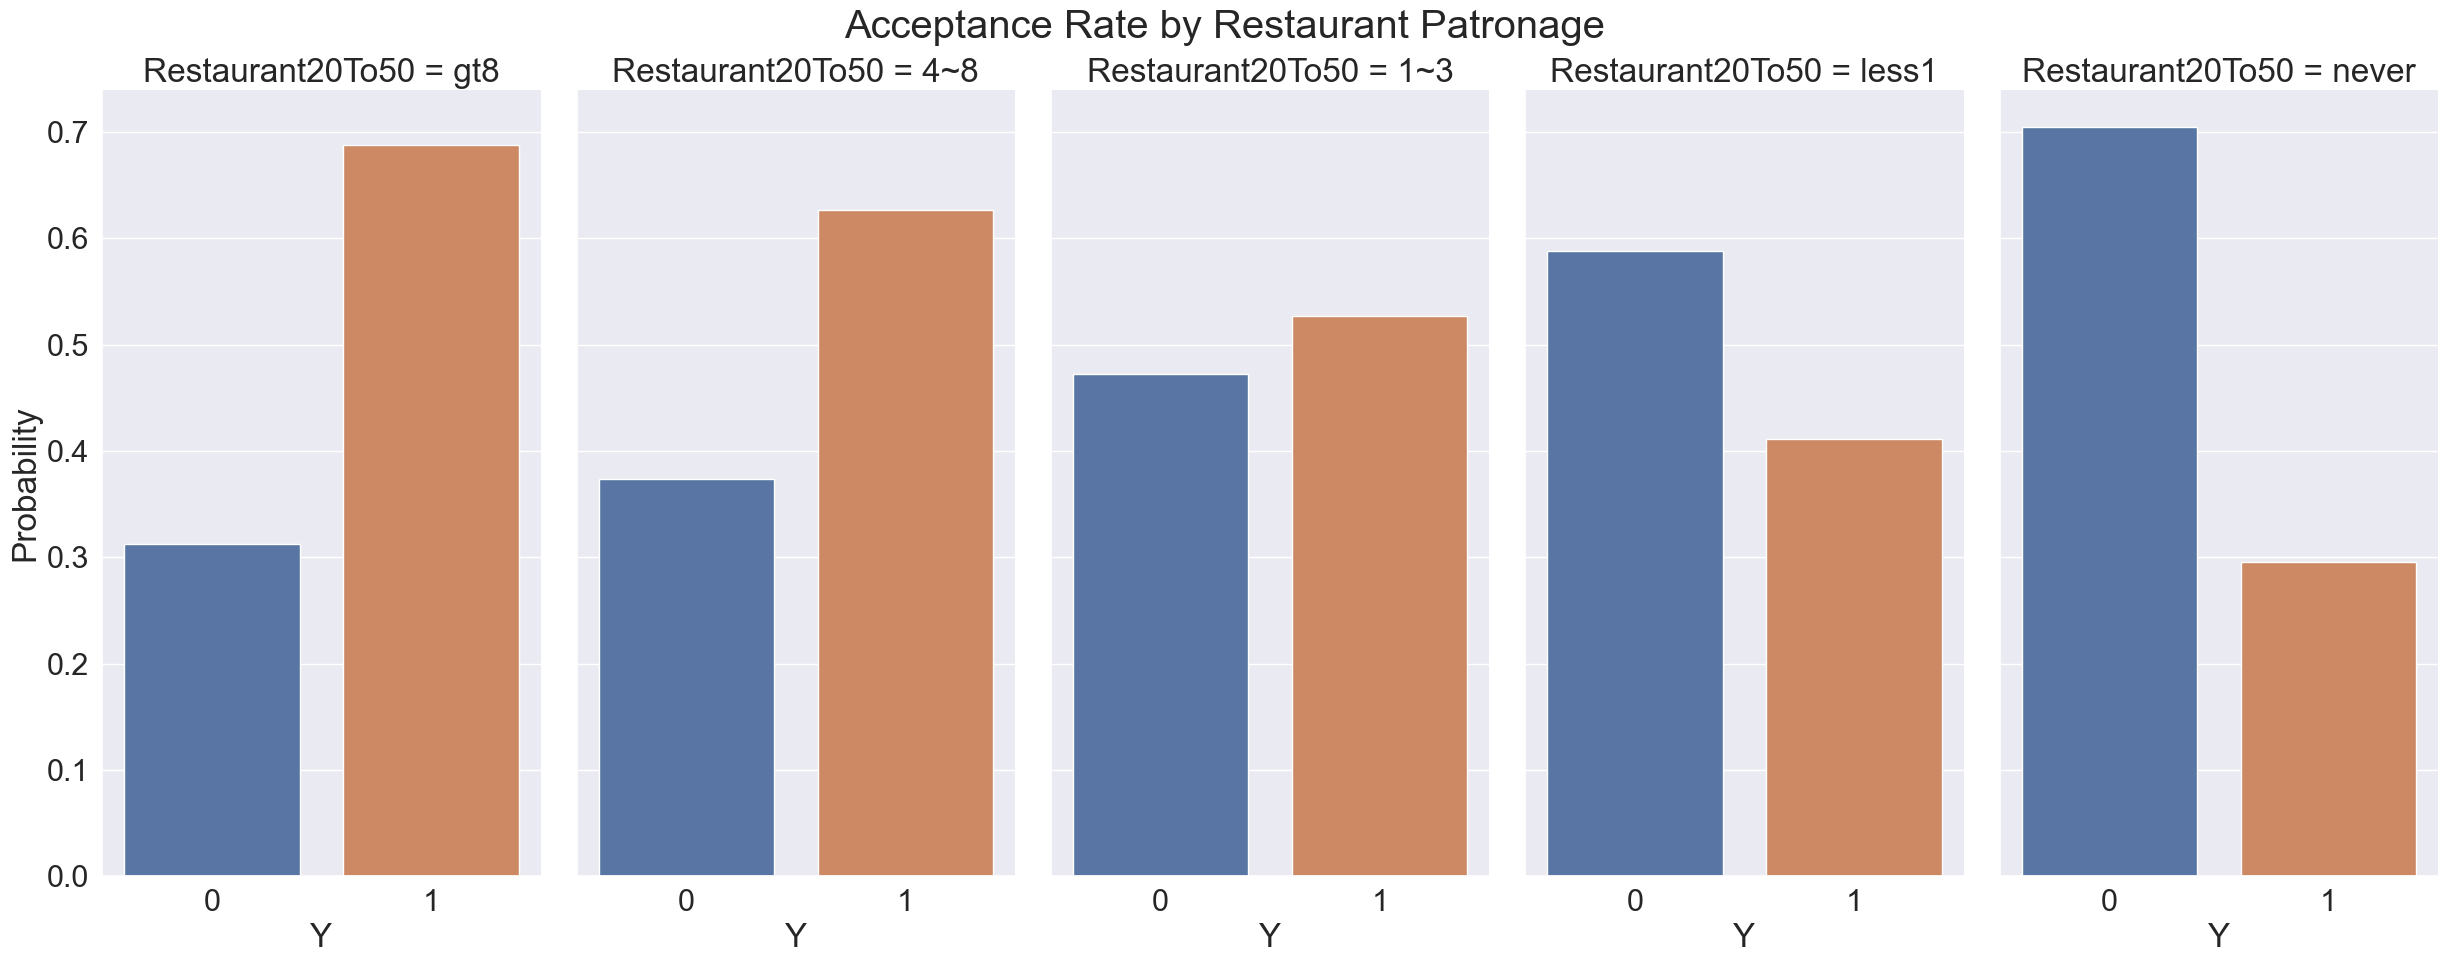

In [42]:
#Show Restaurant20To50 as an example of high correlation
#derive probability from a count of acceptance over time
t = pd.DataFrame(restaurants.groupby(['Restaurant20To50', 'Y'])['Y'].count() / restaurants.groupby(['Restaurant20To50'])['Y'].count())
t.columns = ['Probability']
t = t.reset_index()
t = t.sort_values(by=['Y', 'Probability'])

#plot the series with legible axes and labels
sns.set(font_scale=2)
ax = sns.catplot(t, kind="bar", x="Y", y="Probability", col="Restaurant20To50", height=10, aspect=0.5)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Acceptance Rate by Restaurant Patronage')

**Time of Day**

Time of day is an example of high correlation with coupon acceptance. See plot below.

Note the 10AM timeslot has a high probability of acceptance.

C:\Users\mibrown\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Acceptance Rate by Time of Day')

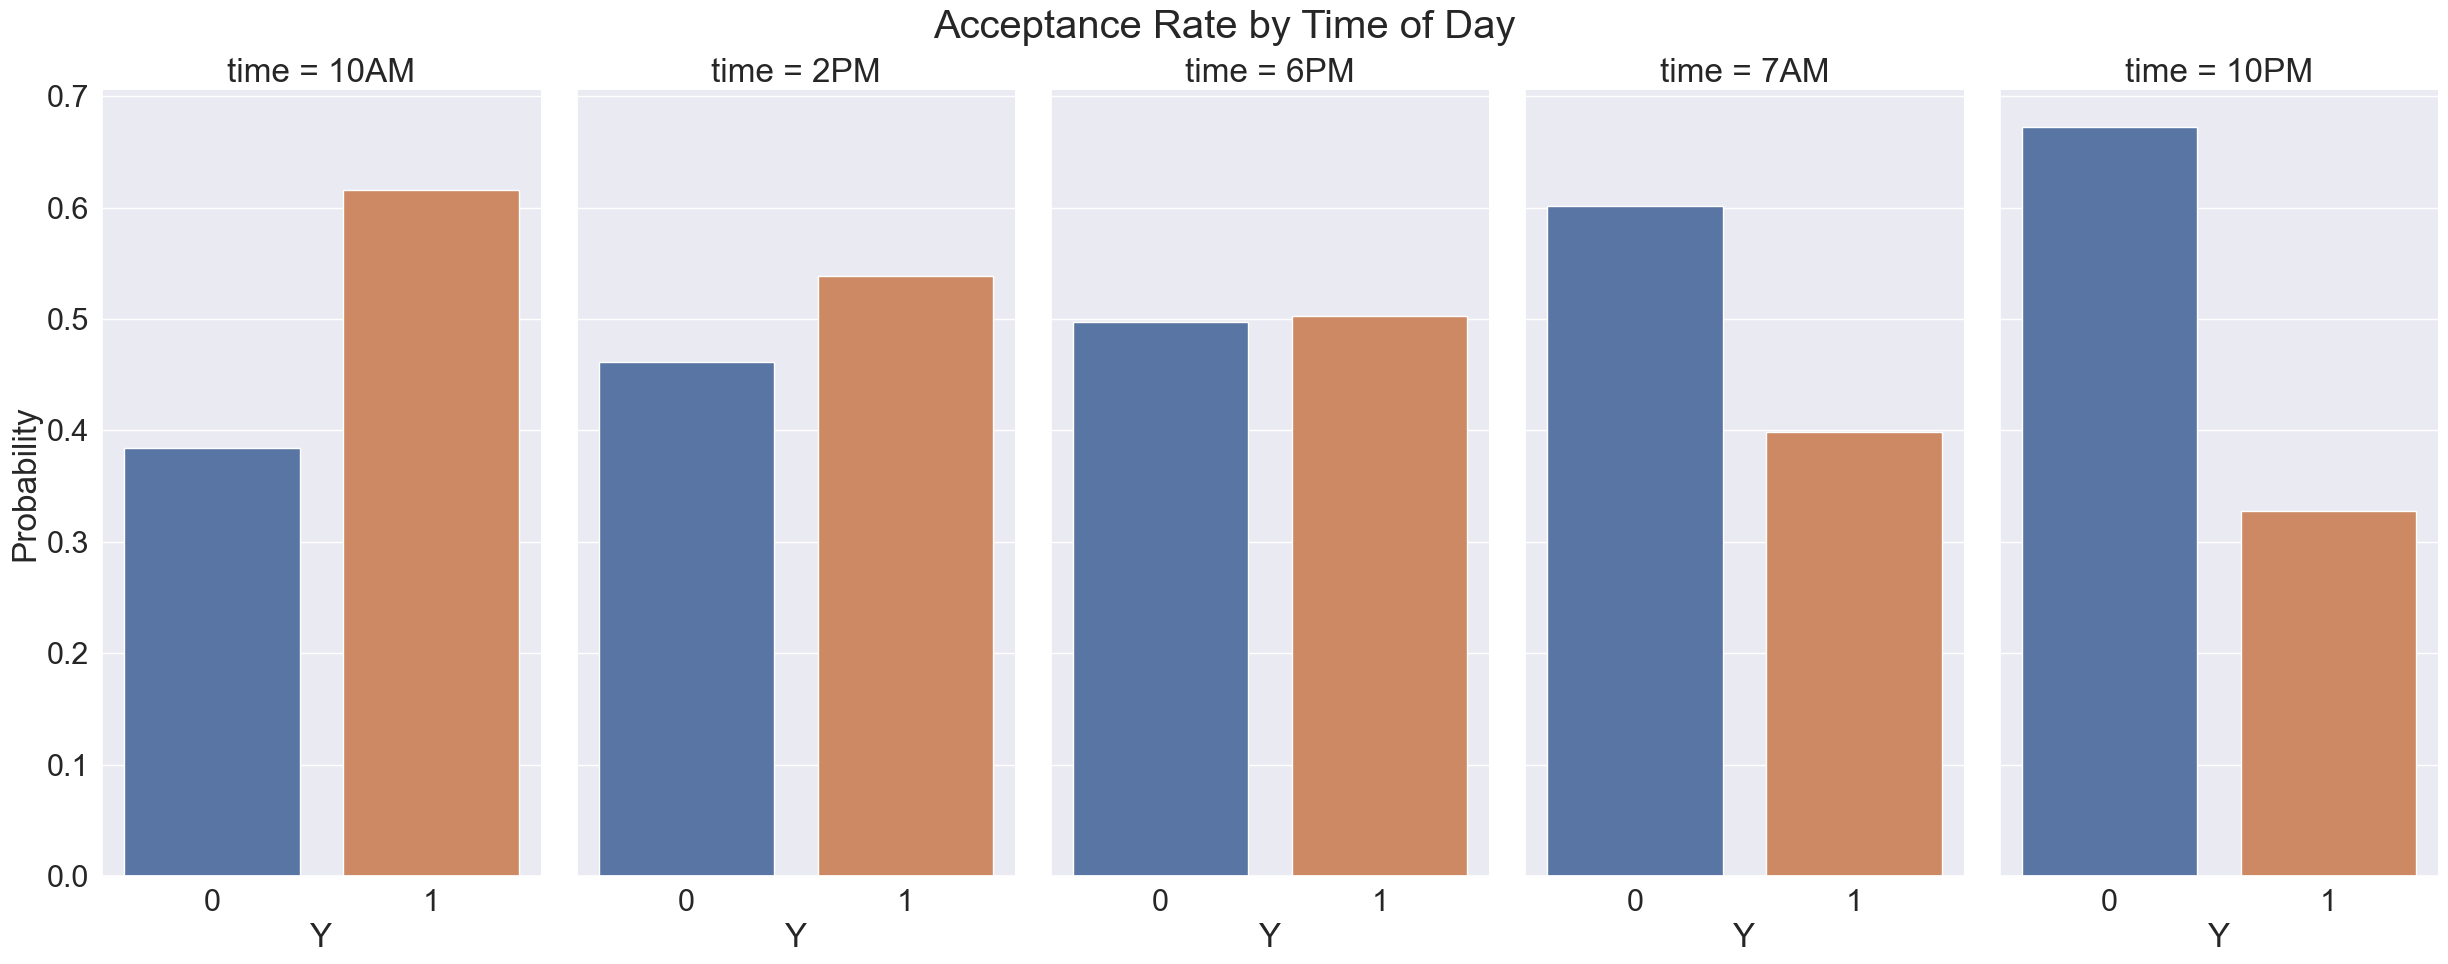

In [31]:
#Show time of day as an example of high correlation
#derive probability from a count of acceptance over time
t = pd.DataFrame(restaurants.groupby(['time', 'Y'])['Y'].count() / restaurants.groupby(['time'])['Y'].count())
t.columns = ['Probability']
t = t.reset_index()
t = t.sort_values(by=['Y', 'Probability'])

#plot the series with legible axes and labels
sns.set(font_scale=2)
ax = sns.catplot(t, kind="bar", x="Y", y="Probability", col="time", height=10, aspect=0.5)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Acceptance Rate by Time of Day')

**Passenger**

Passenger is an example of high correlation with coupon acceptance. See plot below.

Note people riding with their partner were most likely to accept, and people riding with children least likely.

C:\Users\mibrown\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Acceptance Rate by Passenger')

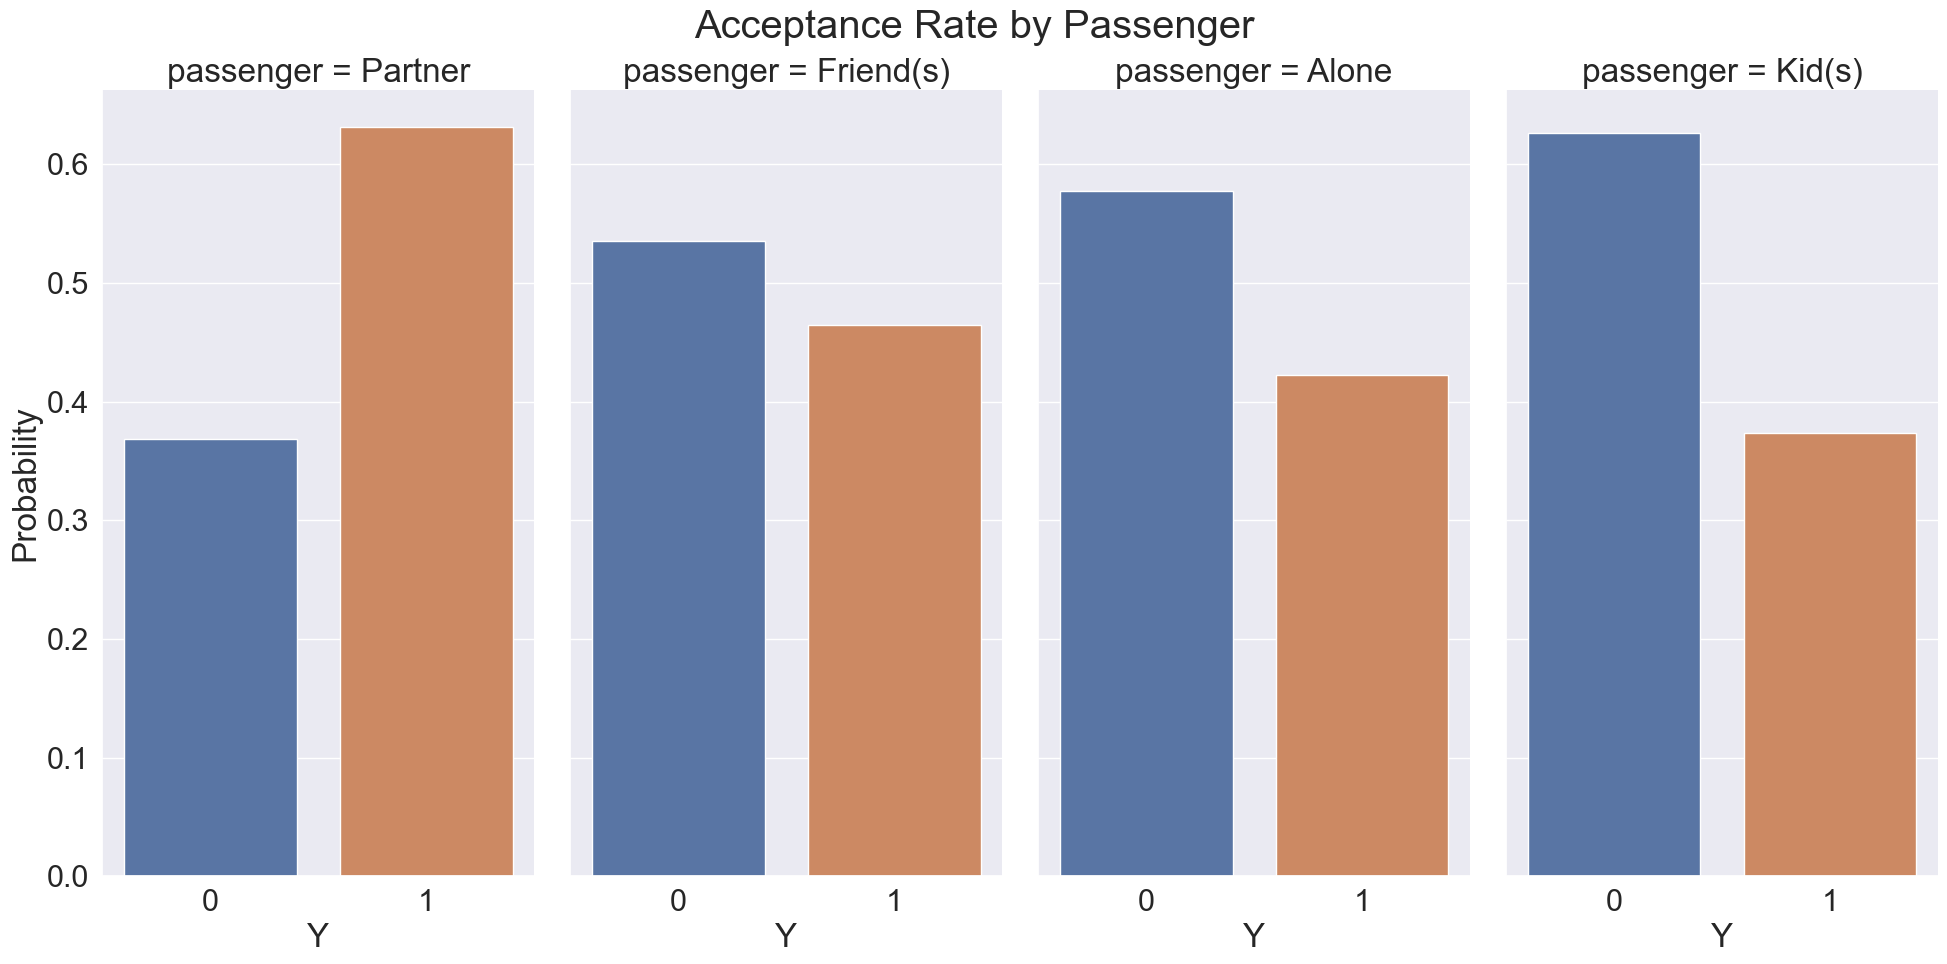

In [32]:
#Show Passenger as an example of high correlation
#derive probability from a count of acceptance over time
t = pd.DataFrame(restaurants.groupby(['passenger', 'Y'])['Y'].count() / restaurants.groupby(['passenger'])['Y'].count())
t.columns = ['Probability']
t = t.reset_index()
t = t.sort_values(by=['Y', 'Probability'])

#plot the series with legible axes and labels
sns.set(font_scale=2)
ax = sns.catplot(t, kind="bar", x="Y", y="Probability", col="passenger", height=10, aspect=0.5)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Acceptance Rate by Passenger')

**Occupation**

One surprise in the data was which occupations were most likely to accept the coupon. We are overall cautious on the occupation field as it contains many categories. Too many categories are thought to lead to a more nuanced evaluation of the field with some categories supporting one outcome and some categories supporting another.

Still, worth noting which occupations were interested in this coupon. See plot below.

C:\Users\mibrown\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Acceptance Rate by Occupation')

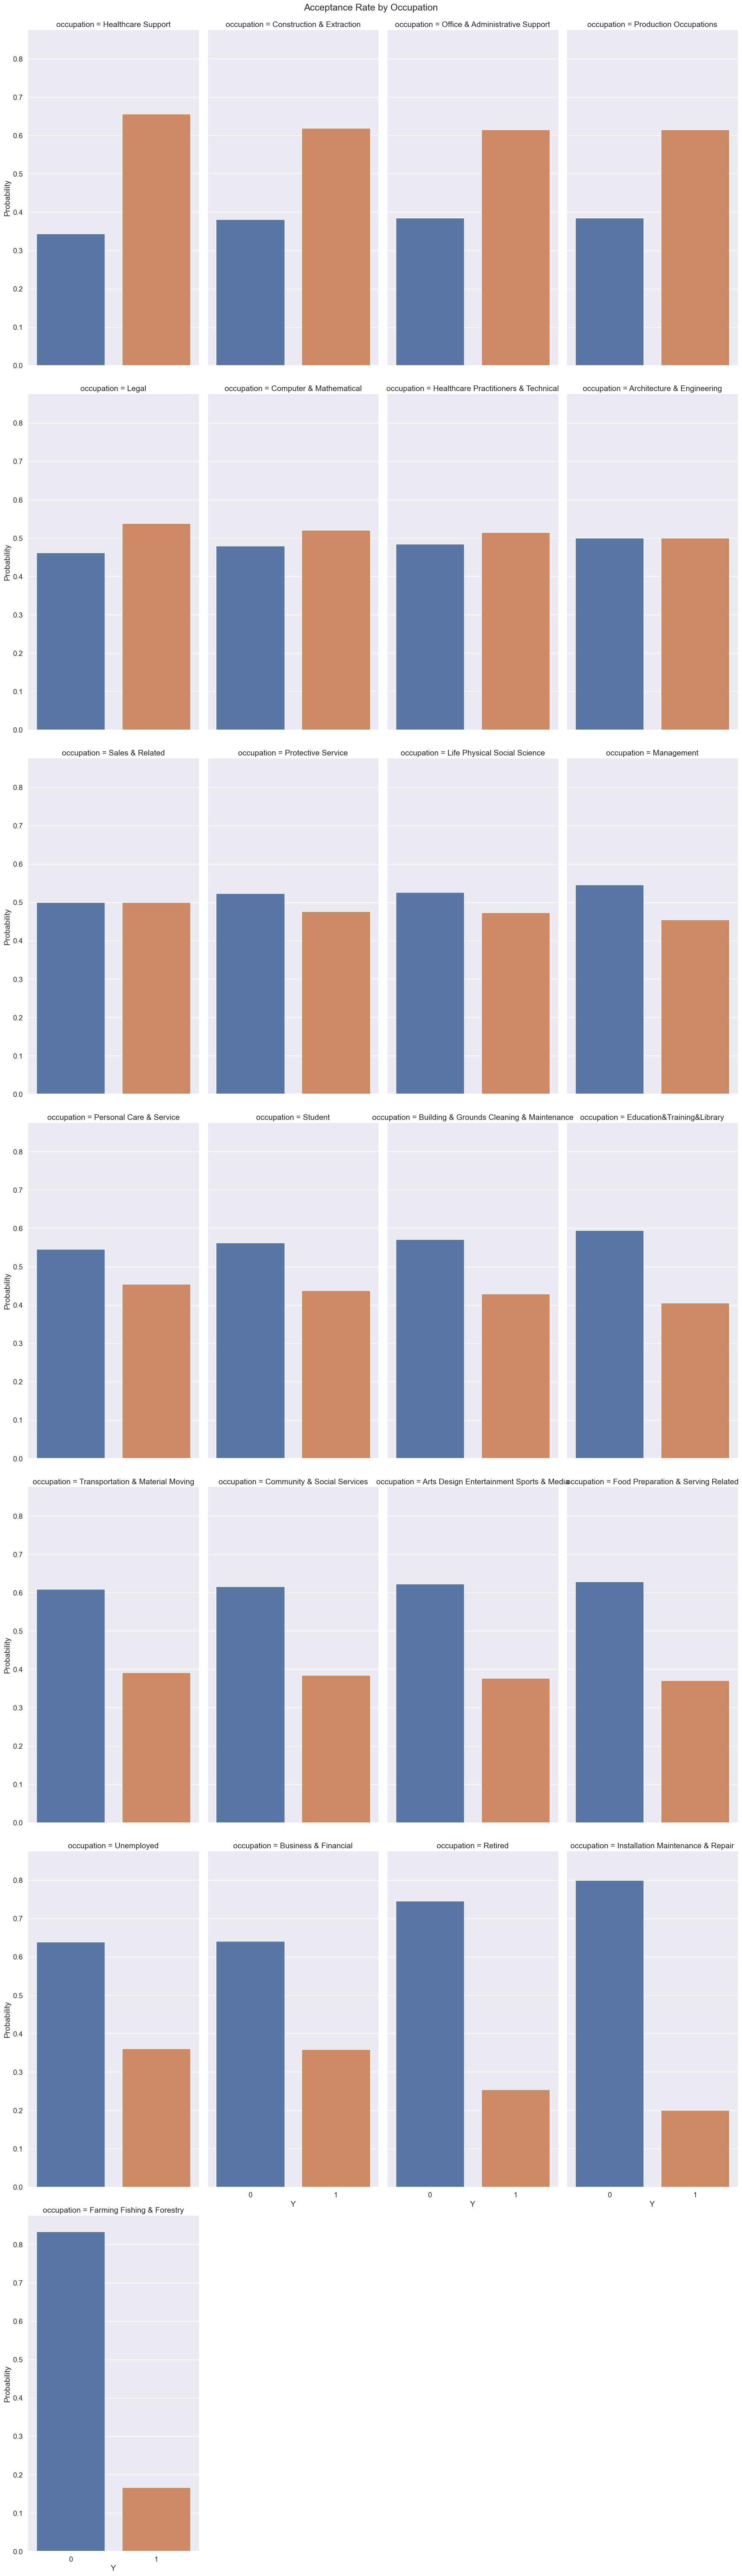

In [68]:
#Show Occupation as an example of mixed correlation
#derive probability from a count of acceptance over time
t = pd.DataFrame(restaurants.groupby(['occupation', 'Y'])['Y'].count() / restaurants.groupby(['occupation'])['Y'].count())
t.columns = ['Probability']
t = t.reset_index()
t = t.sort_values(by=['Y', 'Probability'])

#plot the series with legible axes and labels
sns.set(font_scale=1.25)
ax = sns.catplot(t, kind="bar", x="Y", y="Probability", col="occupation", height=10, aspect=0.5, col_wrap=4)
plt.subplots_adjust(top=0.97)
ax.fig.suptitle('Acceptance Rate by Occupation')

**Education**

Another surprise in the data was the education category. We expected the Restaurant20To50 coupon acceptance to be more highly correlated with higher education, but it was inversely correlated (see below).

C:\Users\mibrown\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Acceptance Rate by Education Level')

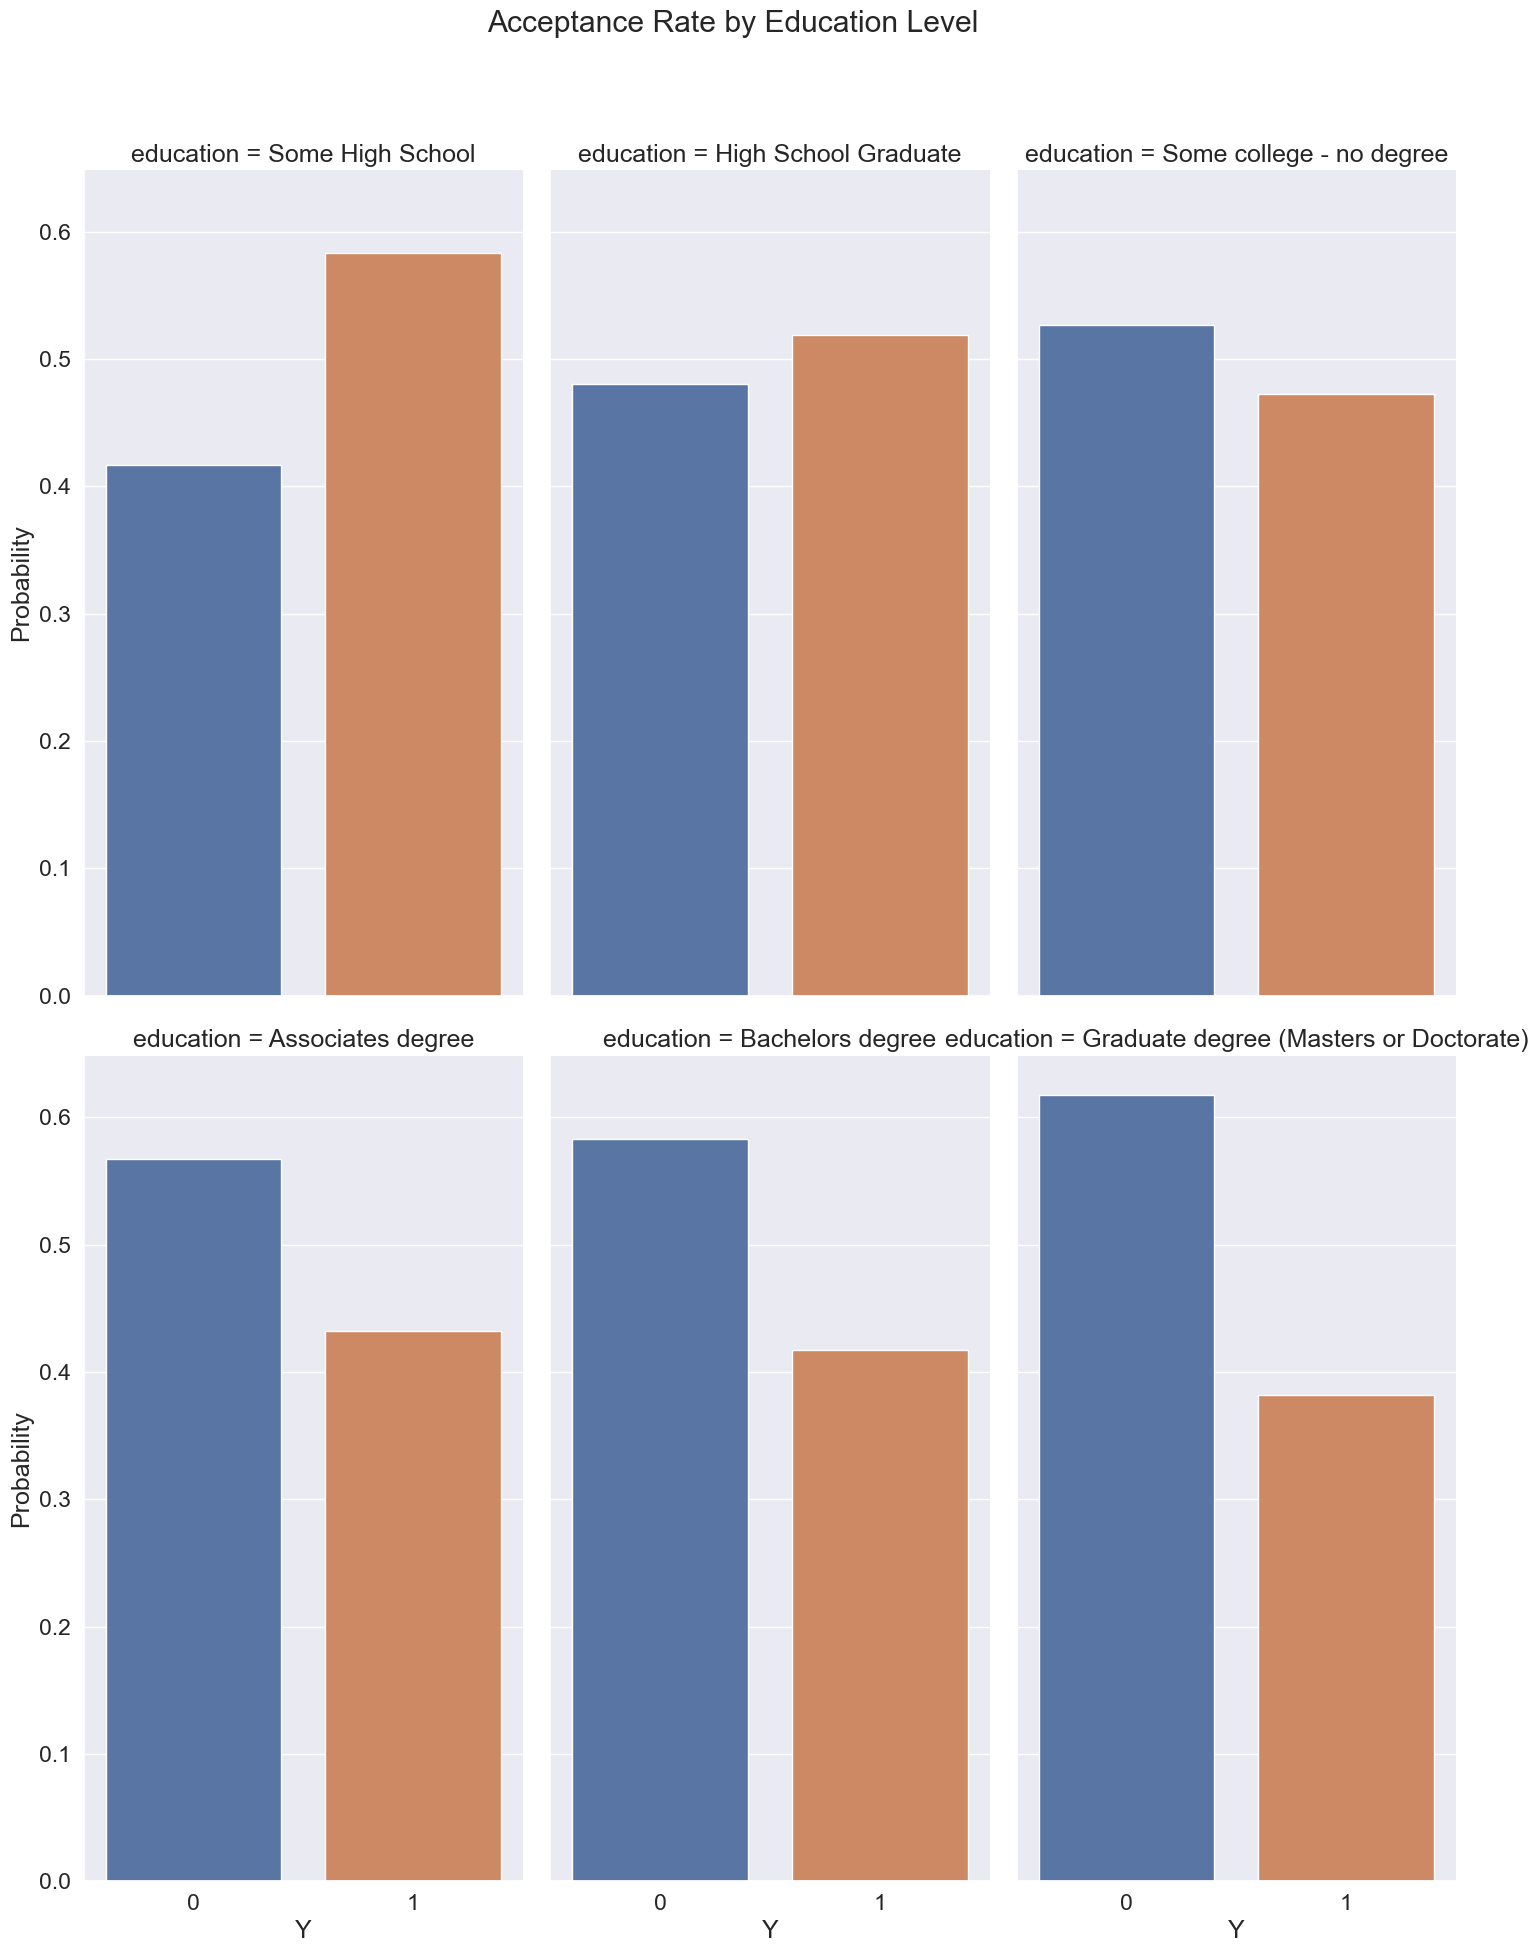

In [71]:
#Show Education as an example of high correlation
#derive probability from a count of acceptance over time
t = pd.DataFrame(restaurants.groupby(['education', 'Y'])['Y'].count() / restaurants.groupby(['education'])['Y'].count())
t.columns = ['Probability']
t = t.reset_index()
t = t.sort_values(by=['Y', 'Probability'])

#plot the series with legible axes and labels
sns.set(font_scale=1.5)
ax = sns.catplot(t, kind="bar", x="Y", y="Probability", col="education", height=10, aspect=0.5, col_wrap=3)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Acceptance Rate by Education Level')

**Income**

Income is an example of non-correlation with coupon acceptance. See plot below.

This surprised us the most as it was thought income would have a high correlation with acceptance of this coupon.

C:\Users\mibrown\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Acceptance Rate by Income')

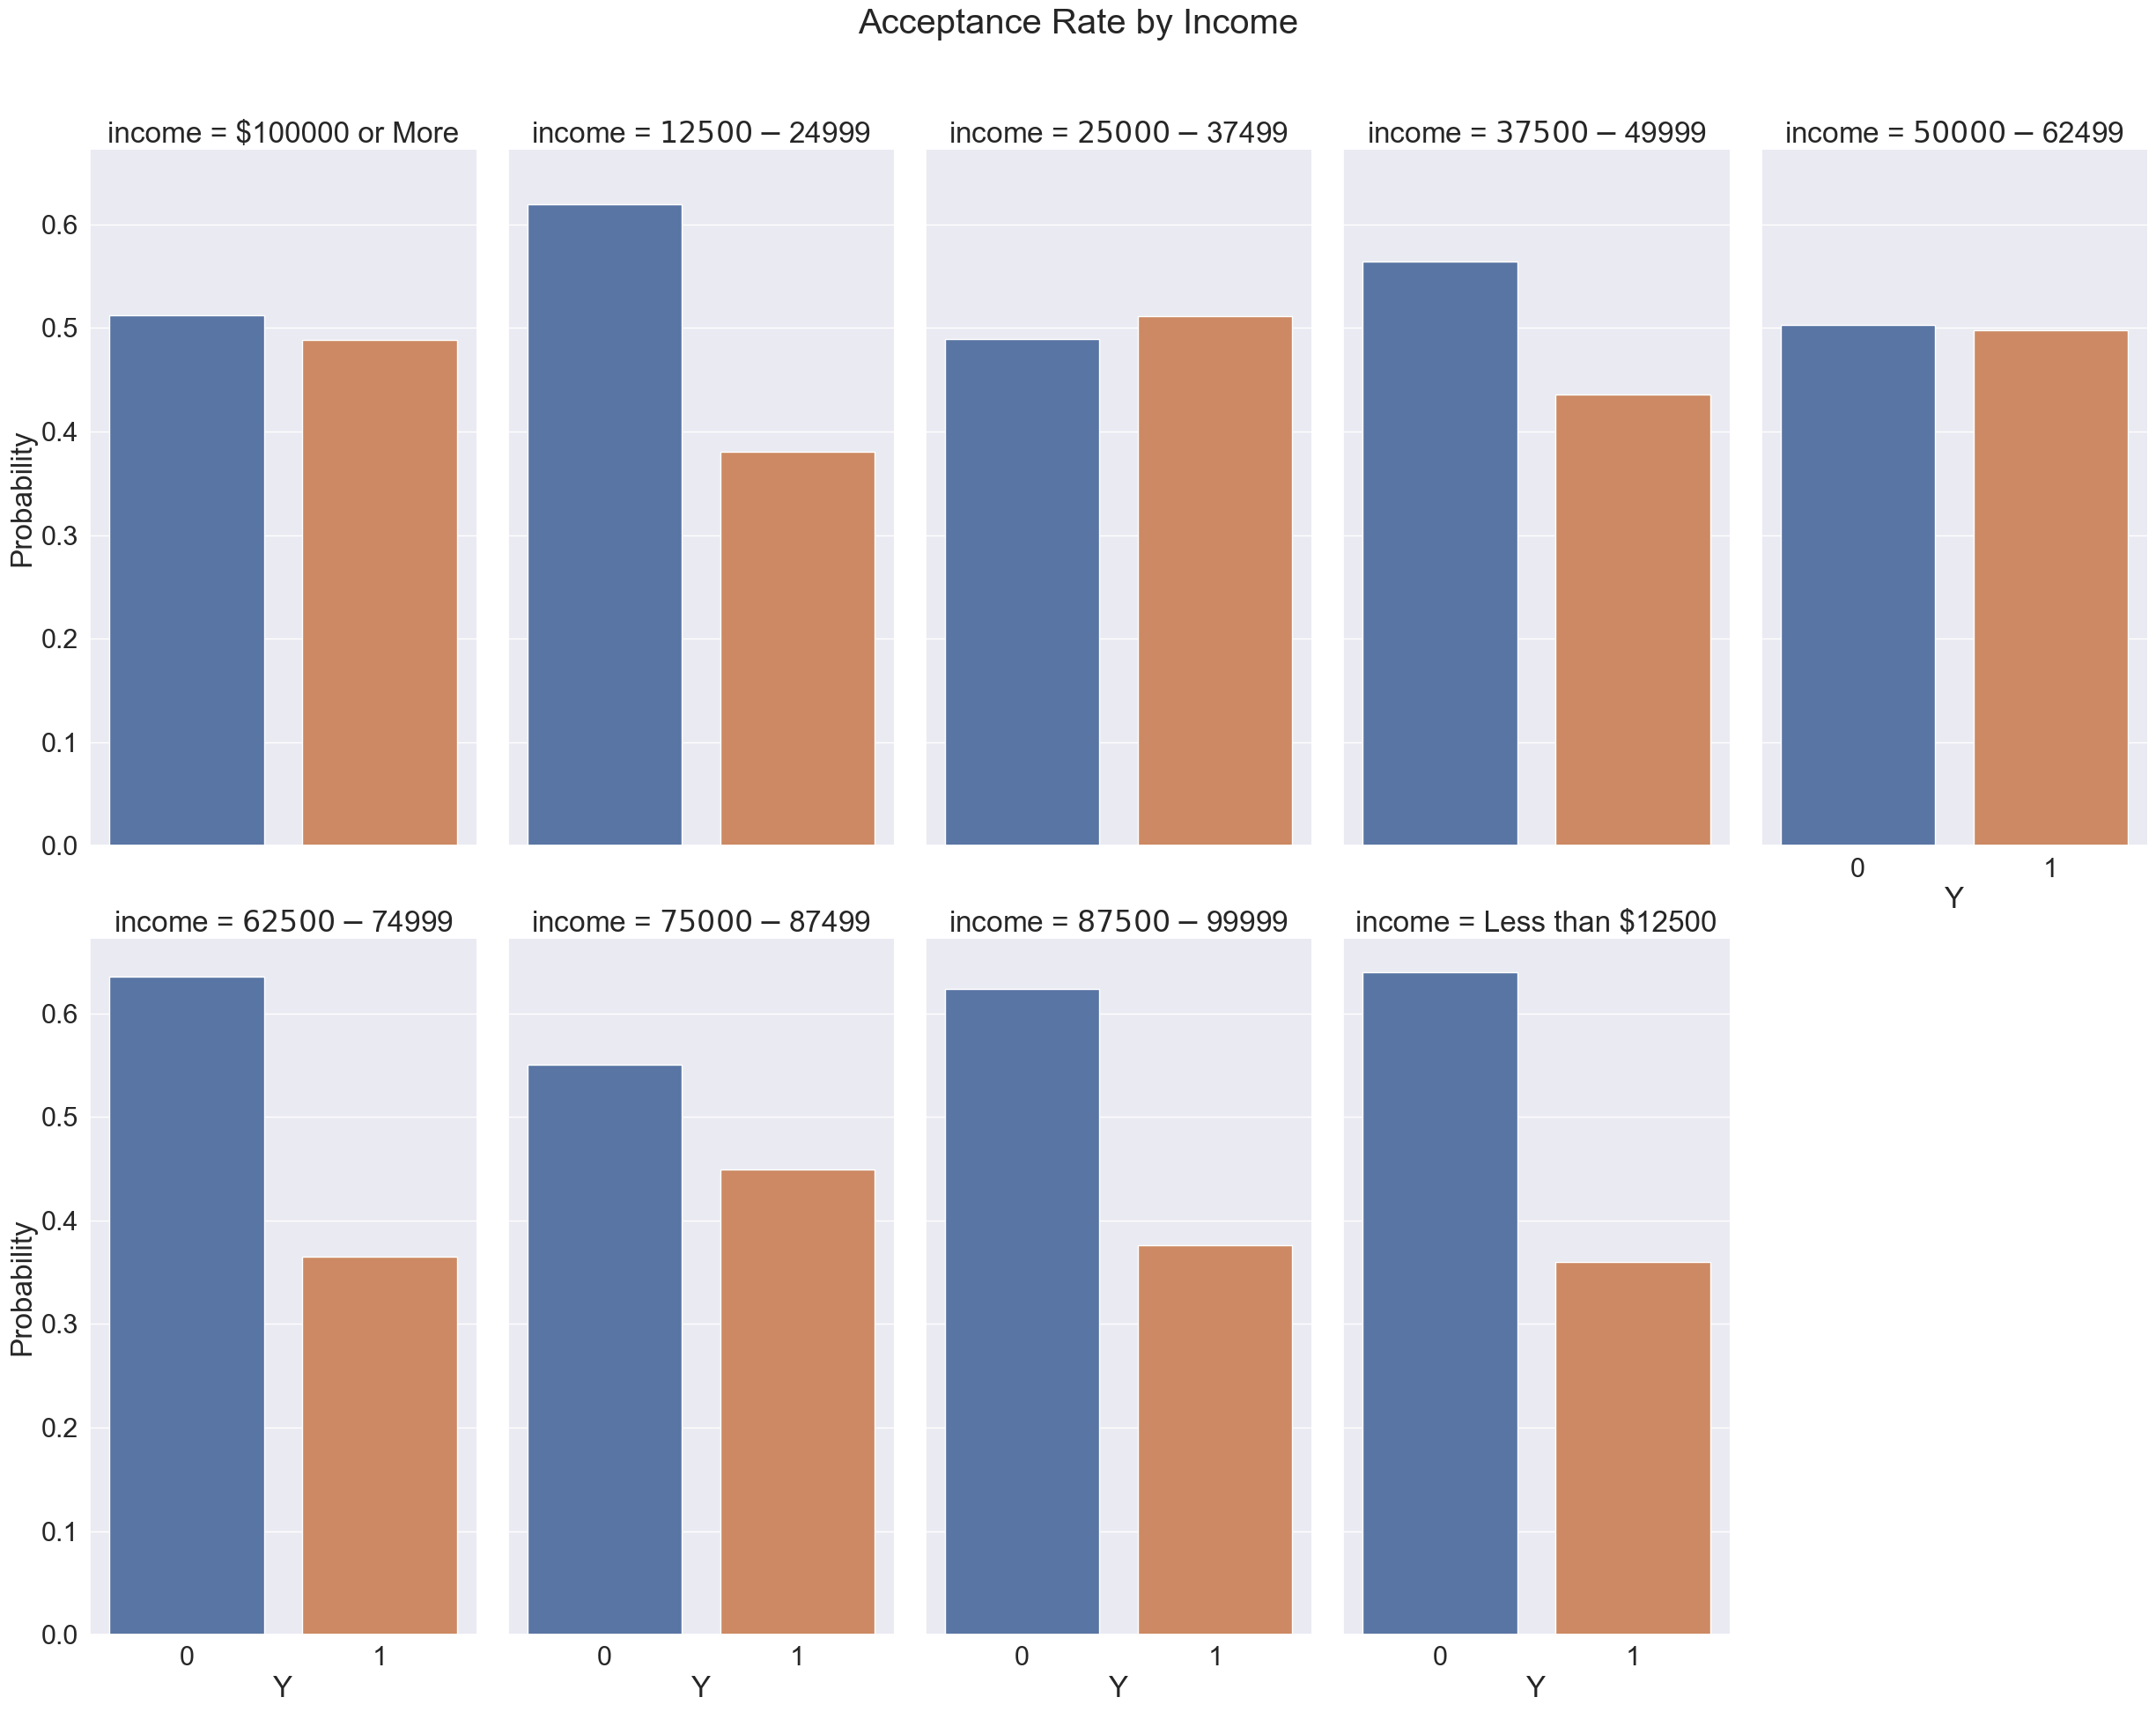

In [53]:
#Show Income as an example of non-correlation
#derive probability from a count of acceptance over time
t = pd.DataFrame(restaurants.groupby(['income', 'Y'])['Y'].count() / restaurants.groupby(['income'])['Y'].count())
t.columns = ['Probability']
t = t.reset_index()
t = t.sort_values(by=['income'])

#plot the series with legible axes and labels
sns.set(font_scale=2)
ax = sns.catplot(t, kind="bar", x="Y", y="Probability", col="income", height=10, aspect=0.5, col_wrap=5)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Acceptance Rate by Income')

### Conclusion 
Looking at the data as a whole, it was surprising that income did not play a bigger role in coupon acceptance for this mid-high price point purchase. Separately, it was also surprising that coupon acceptance correlated with LOWER educational levels, again surprising for this price point.

To have the best chance of success when offering this coupon type, as many as possible of the following conditions should be true:
1. passenger = "Partner"
2. time = "10AM"
3. education = "Some High School" OR "High School Graduate"
4. occupation = "Construction & Extraction" OR "Healthcare Support" OR "Office & Administrative Support" OR "Production Occupations"
5. Restaurant20To50 = as high as possible
6. maritalStatus = "Single" OR "Unmarried partner"
7. weather = "Sunny"
8. temperature = warmer weather
9. expiration = "1d"

Given that the overall acceptance rate of the Restaurant20To50 Coupon was < 50%, using one or more of these categorical settings offered a significantly higher chance of the customer accepting the coupon.

### Next Steps and Recommendations
Our previous conclusion outlines the conditions to have the highest probability of coupon acceptance for a single variable. Therefore as a recommendation to advertisers producing these coupons, the categories we discovered show promise for a future targeted ad campaign.

Additional work could be done to discover relationships among several variables. It is possible that relationships hidden in this analysis due to non-correlation might actually show that when 2 or more variables are combined, there are correlations we didn't see due to our focus on one variable. These relationships might even be stronger than what we found in this analysis.

Another avenue for analysis would be to place a value on the coupons based on how likely they are to be accepted. We anticipate that placing coupons in front of customers has some cost. Therefore, knowing the likelihood of acceptance, we could identify which advertising opportunities are most lucrative balanced against the cost of advertising. This would require additional data to complete.

Overall, this analysis has good conclusions on its own as well as additional possibilities for future discovery.